# Customer Value Analysis From the Ground Up

In this demo, we will utilize an RFM Analysis on retail sales data from UCI Irvine's Machine Learning Repository (link here: https://tinyurl.com/yxpvr6wx). This relativley simple analysis will allow us to answer the question of Who is our most valuable customer?

The code below is annotated, so it is fairly easy to follow along.


In [109]:
#Importing the necessary packages

import plotly
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import plotly.plotly as py
import plotly.tools as tls
import plotly.graph_objs as go

#Kmeans Clustering Packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%config InlineBackend.figure_format='retina' 
from scipy import stats

In [110]:
#Importing the plotly fancy packages

import plotly 
plotly.tools.set_credentials_file(username='aprosise1', api_key='j13cJ9vKwNGliRYD1YbH')

In [111]:
#Reading in the data
df = pd.read_excel("Online_Retail.xlsx")

#looking at the top 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [112]:
#As part of the exploratory analysis, I am going to look at the number of unique states

df.Country.nunique()
#There are 38 unique countries

#Checking to see the number of unique Customer IDs
#df.CustomerID.nunique()
#There are 4,372 Unique Customers

38

In [113]:
df.Country.unique()

#These States are:
#'United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       #'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       #'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       #'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       #'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       #'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       #'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       #'European Community', 'Malta', 'RSA'

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [114]:
customer_country = df[['Country', 'CustomerID']]

In [115]:
#Now I am going to create a table that gives the geographic distribution of sales by country
dist_by_country = customer_country.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending=False)
print(dist_by_country)

                 Country  CustomerID
36        United Kingdom      361878
14               Germany        9495
13                France        8491
10                  EIRE        7485
31                 Spain        2533
24           Netherlands        2371
3                Belgium        2069
33           Switzerland        1877
27              Portugal        1480
0              Australia        1259
25                Norway        1086
19                 Italy         803
6        Channel Islands         758
12               Finland         695
7                 Cyprus         622
32                Sweden         462
1                Austria         401
9                Denmark         389
20                 Japan         358
26                Poland         341
34                   USA         291
18                Israel         250
37           Unspecified         244
30             Singapore         229
17               Iceland         182
5                 Canada         151
1

In [116]:
#Now let's export this table to excel so that we can create a heatmap later

dist_by_country.to_csv('Customer_Distribution_by_Country.csv')

map_df = dist_by_country


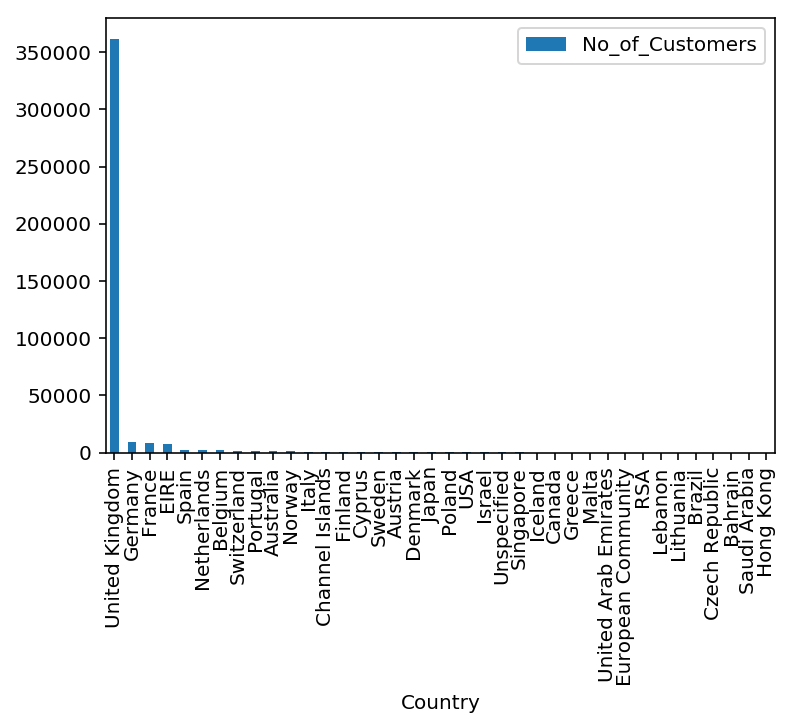

In [117]:
#Histogram visualizing the distribution by country
map_df.rename(columns={'CustomerID': 'No_of_Customers'}, inplace = True)
map_df.plot.bar(x='Country', y = 'No_of_Customers')
plt.show()


Using the exported CSV from above, I generated this pretty cool heat map for this data in PowerBI

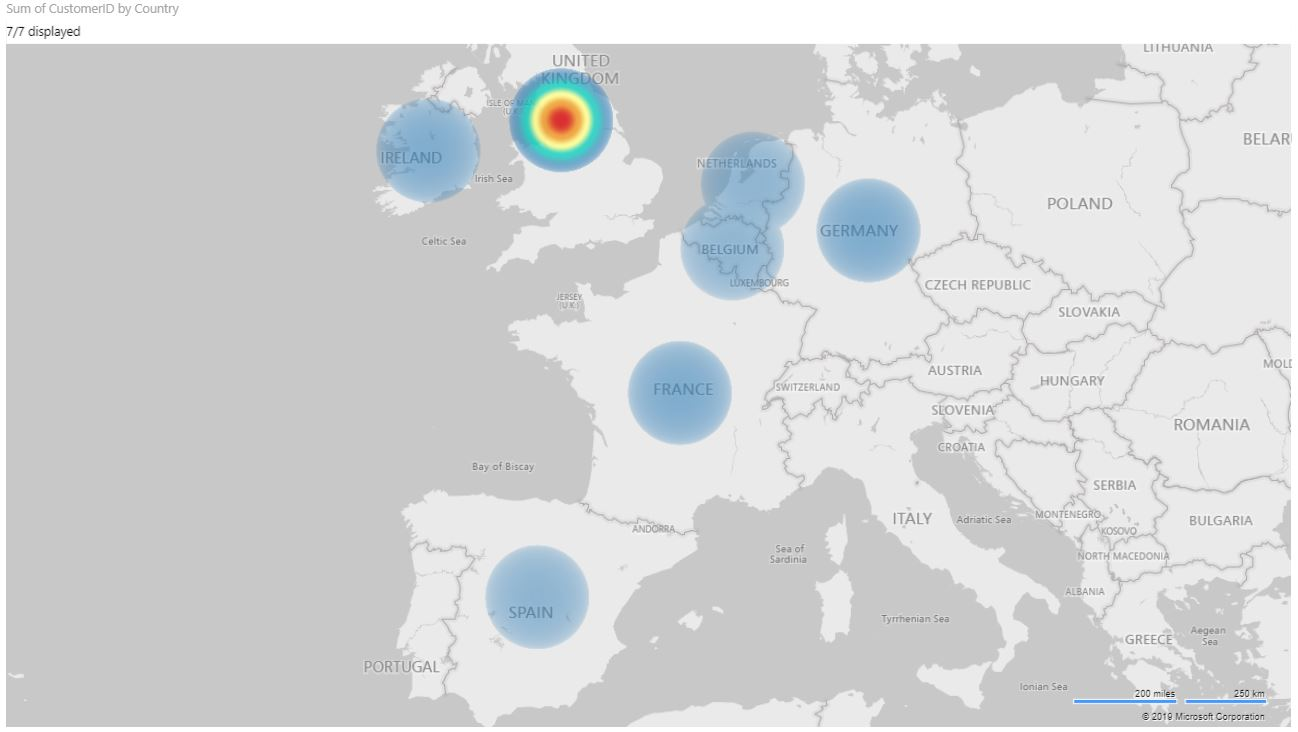

In [118]:
#Heatmap from Power BI

from IPython.display import Image
Image(filename='PowerBI_HeatMap.JPG')


In [119]:
#So for the sake of this demo, let's subset on the U.K. - because that is where the majority of the customers are

df_1 = df.loc[df['Country'] == 'United Kingdom']
df_1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


Now that the data is subset, I need to begin the cleaning. The first step I do is check for NAs or missing values in each column of the subsetted data

In [120]:
df_1.isnull().sum(axis = 0)
#So there are significant missing data. There are 1,454 missing Descriptions and
#133,600 missing customer IDs

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

Because I plan on creating an RFM table and that is agrregated at the customer level I will just remove observations with missing customer IDs - rather than trying to impute them.

In [121]:

#Keeping only the observations where CustomerID is not null
df_1 = df_1[pd.notnull(df_1['CustomerID'])]

#Now to see how man customer IDs are left 
df_1.count()

#There are still 362,878 observations so I should be good 

#Now to double check and make sure that there are still no missing customer IDs
df_1.isnull().sum(axis = 0)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Now to check the minimum values of the price and quantity to make sure none of them were miscoded. For the sake of this analysis, I am going to assume that you cannot have a negative price or quantity In other words, the retailer did not pay customers to take items and the customers did not sell back items.

In [122]:
#This code will check the minimum value of the Quantity column - so I'll be able to see if there are negative values in there.
df_1.Quantity.min()

-80995

In [123]:
#So the minimum quantity is in fact negative. Because I know there are negative values in the quantity column, I will work on
#removing them

df_1 = df_1[(df_1['Quantity']>0)]
#Now the data is subset on non-negative quantities
df_1.shape
df_1.info()
#After additional subsetting, I have 354,345 rows - so I removed approximatley 8,500+ negative quantity values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 8 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.3+ MB


Because Total Price was not a column given to me, I will need to create one. Calculating price is fairly simple: total quantity x price. So if I purchased 80 eggs and eggs were 1 dollar each, I would have spent 80 dollars total. Following this formula will give me the data I need to calculate value of the purchases

In [124]:
#Creating the total price column
df_1['TotalPrice'] = df_1['Quantity'] * df_1['UnitPrice']

#Now I check to make sure that the column I created has been added into the data frame
df_1.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


Another step in the data preparation is to order the data by purchase date. In the next blog post, when I create the RFM table, this will help me calculate recency.

First I will find the oldest date and the most recent date. Fortunatley, it is already in the datetime64 format so I don't need to do any tedious reformatting

In [125]:

#Finding the oldest date of purchase
df_1['InvoiceDate'].min()
#Timestamp('2010-12-01 08:26:00')

#Finding the most recent date of purchase
df_1['InvoiceDate'].max()
#Timestamp('2011-12-09 12:49:00')

Timestamp('2011-12-09 12:49:00')

In [126]:
#Because Recency is taken from a single point in time, I will use the most recent date, September 12, 2011, as the present or
#"Now". In order to do this I will need to use the datetime package

#Setting the most recent date as the current date/time
NOW = dt.datetime(2011,12,10)
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'])

df_1.head(10)

df_1.info()

cleaned_data = df_1

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354345 entries, 0 to 541893
Data columns (total 9 columns):
InvoiceNo      354345 non-null object
StockCode      354345 non-null object
Description    354345 non-null object
Quantity       354345 non-null int64
InvoiceDate    354345 non-null datetime64[ns]
UnitPrice      354345 non-null float64
CustomerID     354345 non-null float64
Country        354345 non-null object
TotalPrice     354345 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 27.0+ MB


In [127]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [128]:
cleaned_data.InvoiceNo.nunique()

16649

Now the data is clean and ready to go! Now to build the actual RFM Table. First I will need to aggregate by CustomerID Recency will be calculated by taking the current time (which I set to 2011,12,10 in the previous code). This will get a measure of how recent the individuals customer was

Frequency will be calculated by taking the lenght or number of invoices the customer had. This count will yield a measure of how many purchases the customer made or Frequency

Last I will calculate the monetary value of the purchases. By taking the sum of TotalPrice for each purchase, I will get a measure how much the customer has spent at the online retailer

In [192]:
#Aggregating on Customer ID and putting the correct columns in
rfm = df_1.groupby('CustomerID', as_index=False).agg({'InvoiceDate': lambda x: (NOW - x.max()).days,
                                                      'InvoiceNo': lambda x: len(x),
                                                      'TotalPrice': lambda x: x.sum()})


#Next I will need to change the InvoiceDate from datetime to 
rfm['InvoiceDate'] = rfm['InvoiceDate'].astype(int)
rfm.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotalPrice': 'Monetary_Value'}, inplace=True)

#Now to look at the RFM table
rfm.head(10)
list(rfm)

['CustomerID', 'Recency', 'Frequency', 'Monetary_Value']

BOOM - the table is created

Here is an interpretation of the top three rows of the table

Row (1): Customer 12346 has a Recency of 325 - so the last purchase was made nearly a year ago, a single purchase (b/c frequency =1) and a monetary value of $77,183.60.

Row (2): Customer 124747 has a Recency of 2 - so the last purchase was made two days ago, a frequency of 103, so they are making purchases more frequently than customer 12346 and a monetary value of $4,196 so the overall value of their purchases are less than customer 12346

Row (3): Customer 12748 has a Recency of 0, so their last purchase was made NOW. This customer has made 4,596 purchases - so they are making purchases very frequently and the monetary value of the purcchases is $33,719 - so far and away spending the least per purchase.


Visualizing the 3 dimensions of the RFM dataset

In [201]:
#Subsetting where Monetary_Value is greater than 100k in order to get a better visualization

rfm_subset = rfm[(rfm['Monetary_Value'] >= 50000) & (rfm['Recency'] > 0) & (rfm['Recency'] < 100)]

rfm_subset.nunique()

CustomerID        12
Recency            8
Frequency         12
Monetary_Value    12
dtype: int64

In [202]:
data = [go.Scatter3d(x = rfm_subset["Monetary_Value"],
                     y = rfm_subset["Recency"],
                     z = rfm_subset['Frequency'],
                     mode = 'markers',
                     marker=dict(color = rfm_subset["CustomerID"]))] 

fig = go.Figure(data=data) 
py.iplot(fig)

Now here is a 3D visualization with some other data that might help understand the texture RFM Analysis provides

In [173]:
df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')
df.head()


data = []
clusters = []
colors = ['rgb(228,26,28)','rgb(55,126,184)','rgb(77,175,74)']

for i in range(len(df['Name'].unique())):
    name = df['Name'].unique()[i]
    color = colors[i]
    x = df[ df['Name'] == name ]['SepalLength']
    y = df[ df['Name'] == name ]['SepalWidth']
    z = df[ df['Name'] == name ]['PetalLength']
    
    trace = dict(
        name = name,
        x = x, y = y, z = z,
        type = "scatter3d",    
        mode = 'markers',
        marker = dict( size=3, color=color, line=dict(width=0) ) )
    data.append( trace )

layout = dict(
    width=800,
    height=550,
    autosize=False,
    title='Iris dataset',
    scene=dict(
        xaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=dict(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'        
    ),
)

fig = dict(data=data, layout=layout)

# IPython notebook
# py.iplot(fig, filename='pandas-3d-iris', validate=False)

url = py.plot(fig, filename='pandas-3d-iris', validate=False)

In [174]:
IFrame(url, width=700, height=350)

Now that we understand what exactly the RFM analysis is doing - we will move into segmenting each client into buckets

Now I will perform so rudimentary analysis to see who the most valuable customers are.

In [22]:
#I will start by digging into the first customer - the code below subsets on the first customer
first_customer = df[df['CustomerID']== 12346.0]
first_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom


So we can see that this customer has only shopped once, but has made a purchase of 74,215 units at $1.04 per unit yielding $77,183.60 in revenue. While this customer placed the order nearly a year ago (from 'NOW'), it was for a very large amount. Now I'm going to compare this with another customer.

In [23]:
#Digging into the second customer ID
second_customer = df[df['CustomerID']==12747.0]
second_customer

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9754,537215,85124C,GREEN JUICY FRUIT PHOTO FRAME,12,2010-12-05 15:38:00,2.55,12747.0,United Kingdom
9755,537215,85124B,BLUE JUICY FRUIT PHOTO FRAME,6,2010-12-05 15:38:00,2.55,12747.0,United Kingdom
9756,537215,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2010-12-05 15:38:00,1.69,12747.0,United Kingdom
9757,537215,85062,PEARL CRYSTAL PUMPKIN T-LIGHT HLDR,24,2010-12-05 15:38:00,1.65,12747.0,United Kingdom
9758,537215,85064,CREAM SWEETHEART LETTER RACK,6,2010-12-05 15:38:00,5.45,12747.0,United Kingdom
9759,537215,82484,WOOD BLACK BOARD ANT WHITE FINISH,36,2010-12-05 15:38:00,5.55,12747.0,United Kingdom
9760,537215,21136,PAINTED METAL PEARS ASSORTED,8,2010-12-05 15:38:00,1.69,12747.0,United Kingdom
27390,538537,22795,SWEETHEART RECIPE BOOK STAND,16,2010-12-13 10:41:00,5.95,12747.0,United Kingdom
27391,538537,48138,DOORMAT UNION FLAG,2,2010-12-13 10:41:00,7.95,12747.0,United Kingdom
27392,538537,82494L,WOODEN FRAME ANTIQUE WHITE,24,2010-12-13 10:41:00,2.55,12747.0,United Kingdom


This customer had a much higher frequency and recency of purchase, but it was for about 6% of the monetary value of the first customer's single order. However, because we are looking for repeat sales, I will make the criteria for "best customers" have the lowest recency, highest frequency and highest monetary value. One way of looking at that will be to divide the customers into quartiles by recency, frequency and monetary value. Then I will add a column for each quartile rank for recency frequency and monetary value. Then it will be a simple matter of sorting to see which customers are the best.

In [24]:
#Setting up the quantiles
quantiles = rfm.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

#Creating the segmented RFM Table
segmented_rfm = rfm

#'Scoring'
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1
    
    
#Adding the segment numbers to the newly creataed RFM Table   
segmented_rfm['r_quartile'] = segmented_rfm['Recency'].apply(RScore, args=('Recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['Frequency'].apply(FMScore, args=('Frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['Monetary_Value'].apply(FMScore, args=('Monetary_Value',quantiles,))
segmented_rfm.head()

,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


Basically this scoring plotted the customers in 3-dimensional space. with a score of '1-1-1' being the best and '4-4-4' being being the worst. Now I will add a new column that contains the aggregate scores

In [25]:
#Creating the aggregate scores column
segmented_rfm['RFM_AggScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str)+ segmented_rfm.m_quartile.map(str)
segmented_rfm.head()

,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile,RFM_AggScore
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122


Now I will sort on RMF_AggScore for the top 10 customers using this analysis. I will use Monetary Value as the tie breaker

In [26]:
segmented_rfm[segmented_rfm['RFM_AggScore']=='111'].sort_values('Monetary_Value', ascending=False).head(10)

,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile,RFM_AggScore
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


In [27]:
#I will now write this segmented RFM table to a csv to use later
segmented_rfm.to_csv('Segmented_RFM')

Now we have a segmented RFM table from which we can make actionable decisions off of.

# Customer Lifetime Value

So now we have a quantified ranking of who our best customers are based off of an RFM Analysis. The question now is what is the value of having these customers?

Fortunatley, an analysis of customer lifetime value (CLV) is something that is standard, answers these questions and actually builds off of the same data. 

From Data Camp:
"Italian economist Vilfredo Pareto states that 80% of the effect comes from 20% of the causes, this is known as 80/20 rule or Pareto principle. Similarly, 80% of companies business comes from 20% customers. Companies need to identify those top customers and maintain the relationship with them to ensure continuous revenue. In order to maintain a long-term relationship with customers, companies need to schedule loyalty schemes such as the discount, offers, coupons, bonus point, and gifts.
Targeting a new customer is more costly than retaining existing customers because you don’t need to spend resources, time, and work hard to acquire new customers. You just have to keep the existing customers happy. Business analyst's accurately calculate customer acquisition cost using CLTV(Customer Lifetime Value). CLTV indicates the total revenue from the customer during the entire relationship. CLTV helps companies to focus on those potential customers who can bring in the more revenue in the future."
This tutorial will cover: (i) Customer Lifetime Value (CLTV), (ii) Pros and Cons of CLTV Modeling, (iii) Related work of CLTV, (iv) CLTV Formulas, (v) Implementing CLTV in Python and (vi) simple CLTV prediction modeling

Pros and Cons of CLTV (disclaimer)
"CLTV helps you to design an effective business plan and also provide a chance to scale your business. CLTV draw meaningful customer segments these segment can help you to identify needs of the different-different segment.
Customer Lifetime Value is a tool, not a strategy. CLTV can figure out most profitable customers, but how you are going to make a profit from them, it depends on your strategy. Generally, CLTV models are confused and misused. Obsession with CLTV may create blinders. Companies only focus on finding the best customer group and focusing on them and repeat the business, but it’s also important to give attention to other customers."

(i) Customer Lifetime Value (CLTV)
Definition: Customer Lifetime Value is a monetary value that represents the amount of revenue or profit a customer will give the company over the period of the relationship. CLTV demonstrates the implications of acquiring long-term customers compared to short-term customers. Customer Lifetime Value can help anser the most important questios about sales to every company - such as:
How to identify the most profitable customers How can a company offer the best product and make the most money How to segment profitable customers How much budget is needed (expenditures) to acquire customers
Calculating CLTV "There are lots of approaches available for calculating CLTV. Everyone has his/her own view on it. For computing CLTV we need historical data of customers but you will unable to calculate for new customers. To solve this problem Business Analyst develops machine learning models to predict the CLTV of newly customers."
Approaches for CLTV calculation:
(1) You can compute it by adding profit/revenue from customers in a given cycle. For Example, If the customer is associated with you for the last 3 years, you can sum all the profit in this 3 years. You can average the profit yearly or half-yearly or monthly, but in this approach, you cannot able to build a predictive model for new customers.
(2) Build a regression model for existing customers. Take recent six-month data as independent variables and total revenue over three years as a dependent variable and build a regression model on this data.
(3) CLTV can also implement using RFM(Recency, Frequency, Monetary) values - see Avinash Navlani's tutorial here (https://tinyurl.com/y375q4j9)
(4) CLTV can also be calculated using this equation: 
CLTV = ((Average Order Value * Purchase Frequency)/Churn Rate) * Profit Margin
Where:
Customer Value = Average Order Value * Purchase Frequency
Average Order Value (AOV) = The Average Order value is the ratio of your total revenue and the total number of orders. AOV represents the mean amount of revenue that the customer spends on an order.
~ AOV = Total Revenue / Total Number of Orders
Purchase Frequncy (PF) = Purchase Frequency is the ratio of the total number of orders and the total number of customer. It represents the average number of orders placed by each customer.
~ PF = Total No. of Orders / Total No. of Customers
Churn Rate (Churn) = Churn Rate is the percentage of customers who have not ordered again
Clustomer Lifetime = Customer Lifetime is the period of time that the customer has been continuously ordering
~ Customer Lifetime = 1/Churn Rate
Repeat Rate = Repeat Rate is defined as the ratio of the number of customers with more than one order to the number of unique custoemrs - i.e. if you have 10 customers in a month out of whom 4 return, then your repeat rate is 40%
~ Repeat Rate = No. of Returning Customers / No. of Customers from the previous period

Below is an example of the Formulaic Method of CLTV Analysis:

What we will do is take the RFM table and calculate alot of cool stuff that will give us one big table - then we will join it with the segmented RFM table on CustomerID (the unique identifier)

In [204]:
cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [205]:
cleaned_data['TotalPurchase'] = cleaned_data['Quantity'] * cleaned_data['UnitPrice']

cleaned_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,TotalPurchase
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,20.34


In [206]:
df_2 = cleaned_data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (date.max() - date.min()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Quantity': lambda quant: quant.sum(),
                                        'TotalPurchase': lambda price: price.sum()})

df_2.head()

,InvoiceDate,InvoiceNo,Quantity,TotalPurchase
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


In [207]:
#Number of days = number of days between orders/invoices

In [208]:
df_2.columns=['num_days', 'num_transactions', 'num_units', 'spent_money']
df_2.head()

,num_days,num_transactions,num_units,spent_money
CustomerID,,,,
12346.0,0,1,74215,77183.60
12747.0,366,103,1275,4196.01
12748.0,372,4596,25748,33719.73
12749.0,209,199,1471,4090.88
12820.0,323,59,722,942.34


Now to calculate the Customer Lifetime Value using the formula:
CLTV = ((Average Order Value * Purchase Frequency)/Churn Rate) * Profit Margin
Customer Value = Average Order Value * Purchase Frequency
Step (1) will be Calculating Average Order Value
Step (2) will be calculating Purchase Frequency
Step (3) will be calculating Repeat Rate and Churn Rate
Step (4) will be calculating Profit Margin*
*Note: Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.
Step (5) will be calculating Customer Lifetime Value

In [209]:
# (1) Calculating Average Order Value

df_2['avg_order_value'] = df_2['spent_money']/df_2['num_transactions']

df_2.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value
CustomerID,,,,,
12346.0,0,1,74215,77183.60,77183.600000
12747.0,366,103,1275,4196.01,40.737961
12748.0,372,4596,25748,33719.73,7.336756
12749.0,209,199,1471,4090.88,20.557186
12820.0,323,59,722,942.34,15.971864


In [210]:
# (2) Calculating Purchase Frequency

purchase_frequency=sum(df_2['num_transactions'])/df_2.shape[0]

In [211]:
# (3.1) Calculating Repeat Rate

repeat_rate=df_2[df_2.num_transactions > 1].shape[0]/df_2.shape[0]

In [212]:
# (3.2) Calculating Churn

churn_rate = 1-repeat_rate

In [213]:
purchase_frequency,repeat_rate,churn_rate

(90.37107880642694, 0.9818923743942872, 0.018107625605712774)

In [214]:
#(4) Calculating Profit Margin

df_2['profit_margin']=df_2['spent_money']*0.05

df_2.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin
CustomerID,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800
12747.0,366,103,1275,4196.01,40.737961,209.8005
12748.0,372,4596,25748,33719.73,7.336756,1685.9865
12749.0,209,199,1471,4090.88,20.557186,204.5440
12820.0,323,59,722,942.34,15.971864,47.1170


In [215]:
#(5) Calculating Customer Lifetime Value

#Customer Value

df_2['CLV']=(df_2['avg_order_value']*purchase_frequency)/churn_rate

#Customer Lifetime Value

df_2['cust_lifetime_value']=df_2['CLV']*df_2['profit_margin']

df_2.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value
CustomerID,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06


In [216]:
#Now to write this file to a CSV

df_2.to_csv('CLTV.csv')

In [217]:
rfm.head()

,CustomerID,Recency,Frequency,Monetary_Value
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34


In [232]:
#Joining the Customer Valuation Table with the RFM Table

merged = df_2.merge(segmented_rfm, on = 'CustomerID')

In [233]:
merged.head()

,num_days,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value,Recency,Frequency,Monetary_Value,r_quartile,f_quartile,m_quartile,RFM_AggScore
CustomerID,,,,,,,,,,,,,,,
12346.0,0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12,325,1,77183.60,4,4,1,441
12747.0,366,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07,2,103,4196.01,1,1,1,111
12748.0,372,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07,0,4596,33719.73,1,1,1,111
12749.0,209,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07,3,199,4090.88,1,1,1,111
12820.0,323,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06,3,59,942.34,1,2,2,122


In [234]:
# Now to remove the redundant columns

del merged['Frequency']
del merged['Monetary_Value']
del merged['r_quartile']
del merged['f_quartile']
del merged['m_quartile']
del merged['RFM_AggScore']
#del merged['Recency']
del merged['num_days']


merged.head()

,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value,Recency
CustomerID,,,,,,,,
12346.0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12,325
12747.0,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07,2
12748.0,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07,0
12749.0,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07,3
12820.0,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06,3


In [227]:
#merged.to_csv('merged_data.csv')

In [242]:
#Setting up the quantiles
quantiles = merged.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()

#Creating the segmented RFM Table

#'Scoring'
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

merged['no_transactions_quartile'] = merged['num_transactions'].apply(FMScore, args=('num_transactions',quantiles,))
merged['num_units_quartile'] = merged['num_units'].apply(RScore, args=('num_units',quantiles,))
merged['spent_money_quartile'] = merged['spent_money'].apply(RScore, args=('spent_money',quantiles,))
merged['avg_order_value_quartile'] = merged['avg_order_value'].apply(RScore, args=('avg_order_value',quantiles,))
merged['profit_margin_quartile'] = merged['profit_margin'].apply(RScore, args=('profit_margin',quantiles,))
merged['clv_quartile'] = merged['CLV'].apply(RScore, args=('CLV',quantiles,))
merged['customer_lifetime_value_quartile'] = merged['cust_lifetime_value'].apply(RScore, args=('cust_lifetime_value',quantiles,))
#merged['f_quartile'] = merged['Frequency'].apply(FMScore, args=('Frequency',quantiles,))


merged.head()

,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CLV,cust_lifetime_value,Recency,num_units_quartile,spent_money_quartile,avg_order_value_quartile,profit_margin_quartile,clv_quartile,customer_lifetime_value_quartile,no_transactions_quartile
CustomerID,,,,,,,,,,,,,,,
12346.0,1,74215,77183.60,77183.600000,3859.1800,3.852060e+08,1.486579e+12,325,4,4,4,4,4,4,4
12747.0,103,1275,4196.01,40.737961,209.8005,2.033140e+05,4.265538e+07,2,4,4,4,4,4,4,1
12748.0,4596,25748,33719.73,7.336756,1685.9865,3.661610e+04,6.173424e+07,0,4,4,1,4,1,4,1
12749.0,199,1471,4090.88,20.557186,204.5440,1.025963e+05,2.098545e+07,3,4,4,3,4,3,4,1
12820.0,59,722,942.34,15.971864,47.1170,7.971198e+04,3.755789e+06,3,3,3,2,3,2,3,2


In [ ]:
#Creating the aggregate scores column
segmented_rfm['RFM_AggScore'] = segmented_rfm.r_quartile.map(str) + segmented_rfm.f_quartile.map(str)+ segmented_rfm.m_quartile.map(str)
segmented_rfm.head()